# Segment image series tutorial - This tutorial is a work in progress

The segment image series function helps to separate moderately overlapping plants in a set of multi-plant images taken over time. 

For time series where the plants do not overlap refer to the following tutorials: [VIS tutorial](../vis_tutorial/vis_tutorial.ipynb.

In order to analyze an image series where plants overlap the basic steps would be:

1. Segment the plant from the background to generate a series of masks and save them in a directory. See tutorial ____. 

2. Apply the steps in this tutorial in order to obtain individual labels for each plant in all the images.

3. Run a workflow that loads the labels and uses them to analyze each individual plant.

In [1]:
# Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib inline

In [2]:
# Import libraries
import os
import numpy as np

from plantcv import plantcv as pcv 
from read_dataset import read_dataset


In [3]:
# Input image into self.image (include file path if image is not in 
# the same folder as jupyter notebook)

# Set self.debug to "plot" so that image outputs for each step is shown
# once cell is run in jupyter notebooks (recommended)

class options:
    def __init__(self):        
        self.image = ""
        self.debug = "plot"
        self.writeimg = False
        self.result = "segmentation"
        self.outdir = "./out/"

In [4]:
# Get options
args = options()

# Set debug to the global parameter
pcv.params.debug = args.debug

# set the output directory to the global parameter
pcv.params.debug_outdir = args.outdir

# Set plotting size (default = 100)
pcv.params.dpi = 100

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

## Create lists of paths to images and masks

In [5]:
images_directory = './img/'
masks_directory =  './mask/'

images_paths_sort = read_dataset(source_path=images_directory, sort=True)
# images_paths_sort = sorted(images_paths)
masks_paths_sort = read_dataset(source_path=masks_directory, sort=True)
# masks_paths_sort = sorted(masks_paths)

## Create region of interest in one of the images

In [6]:
i = 0
img0_path = images_paths_sort[i]
img0, _, _ = pcv.readimage(filename=img0_path)

In [7]:
rois, roi_hier = pcv.roi.multi(img=img0, coord=(285,70), radius=23, spacing=(145, 155), nrows=4, ncols=3)

In [8]:
valid_rois = [rois[i] for i in range(1,len(rois),2)]

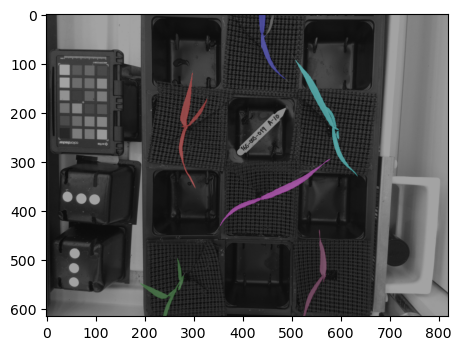

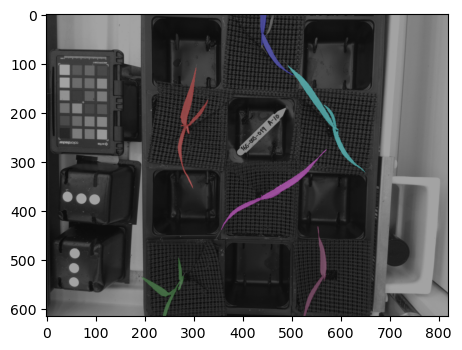

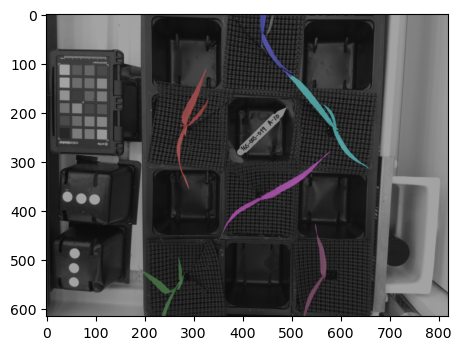

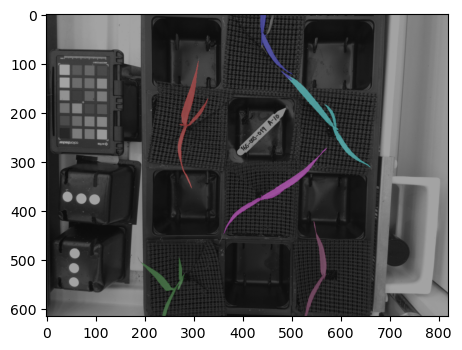

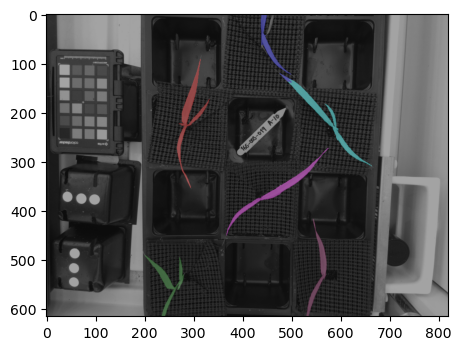

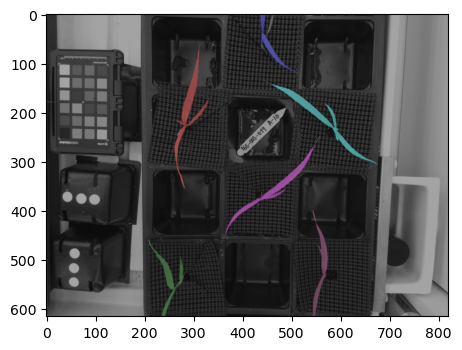

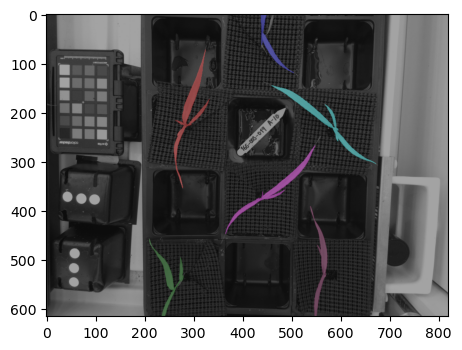

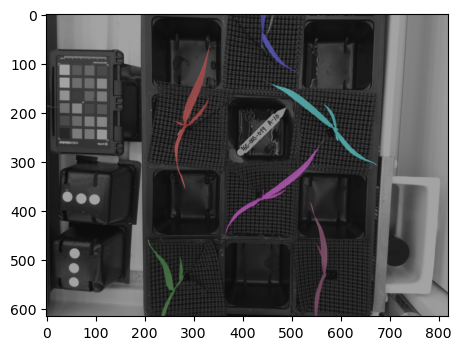

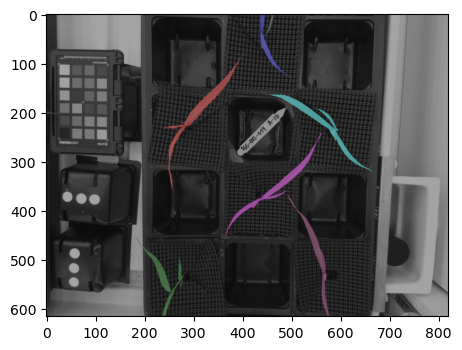

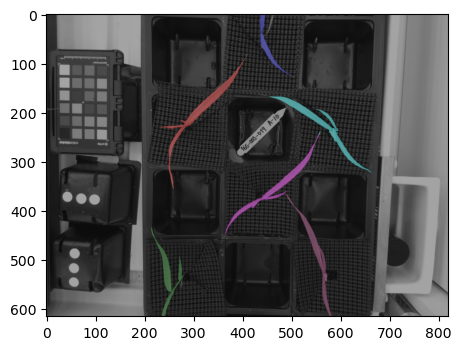

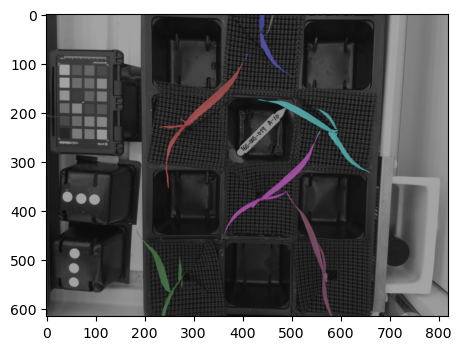

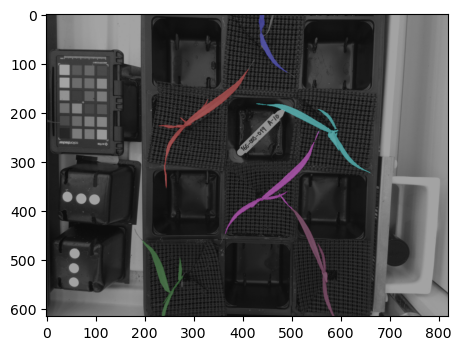

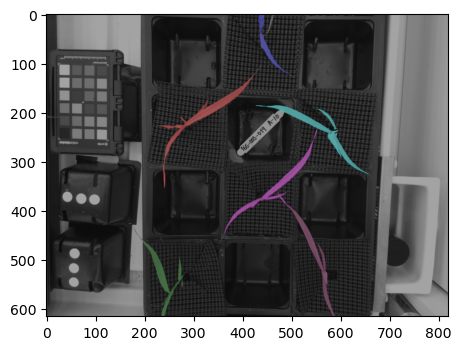

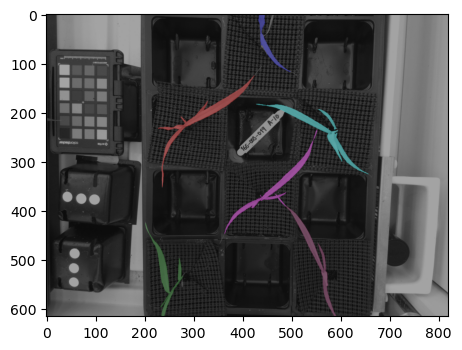

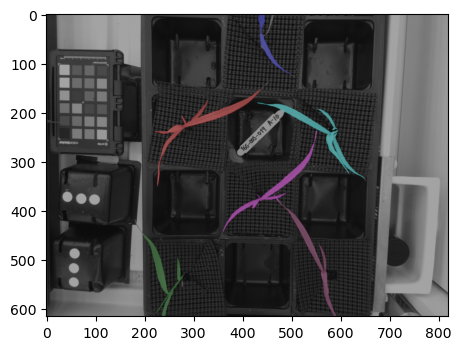

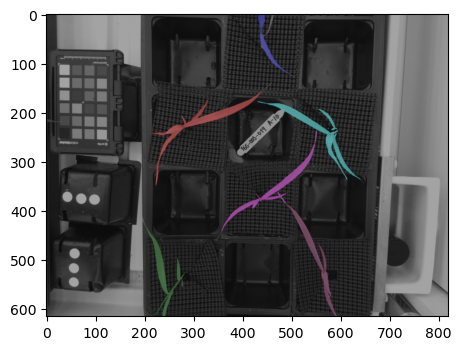

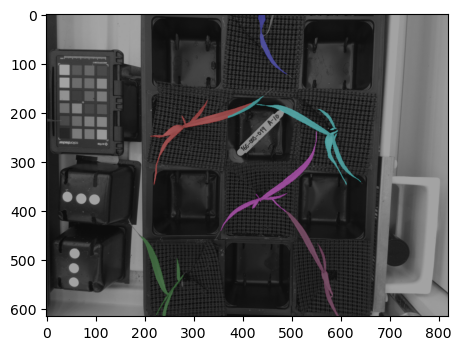

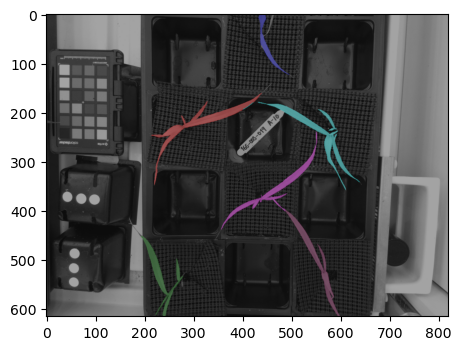

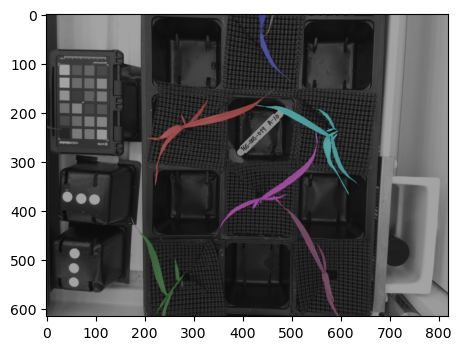

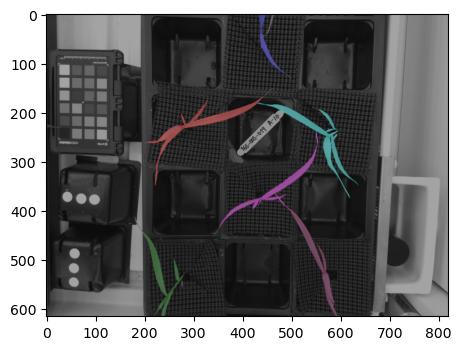

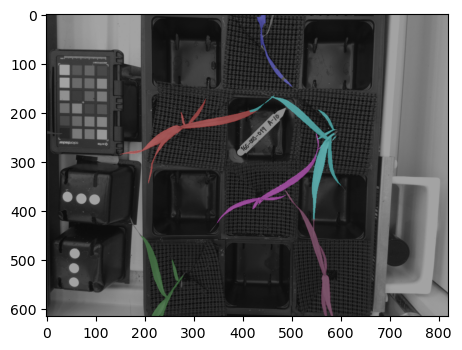

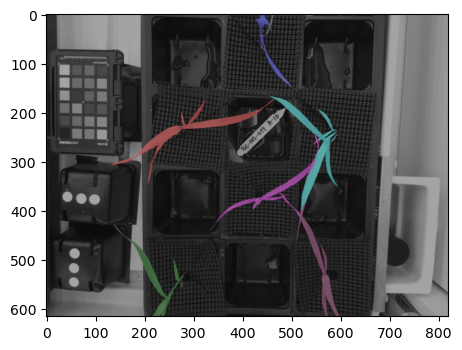

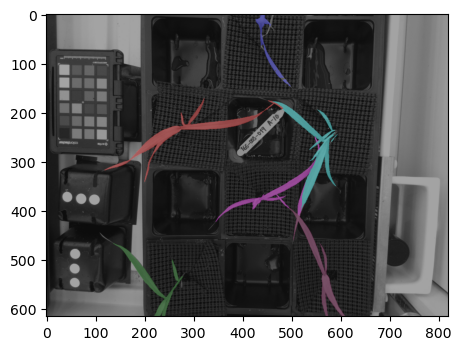

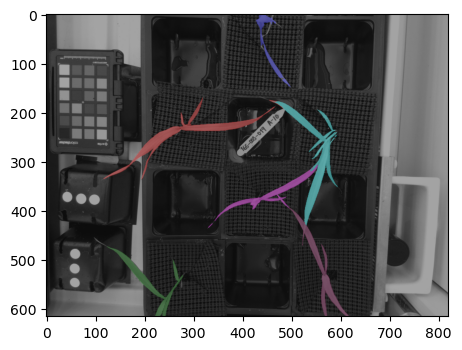

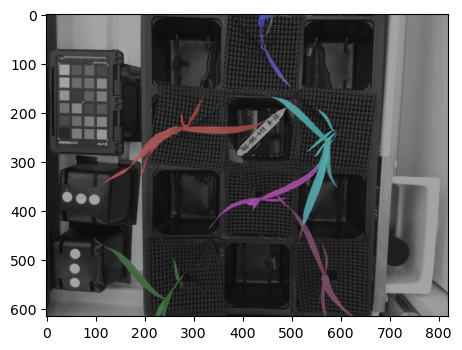

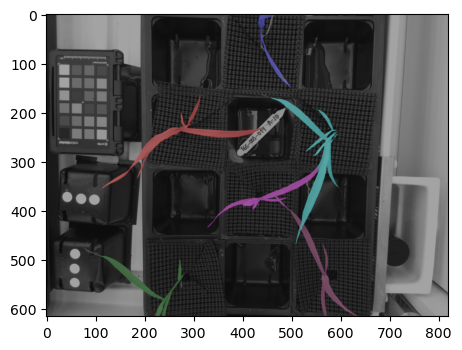

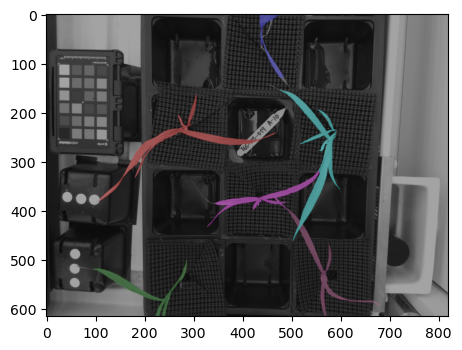

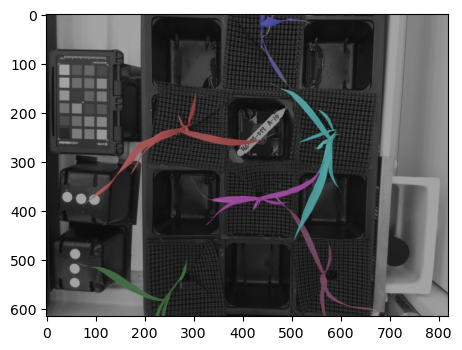

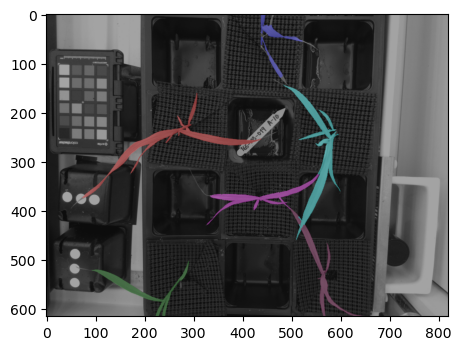

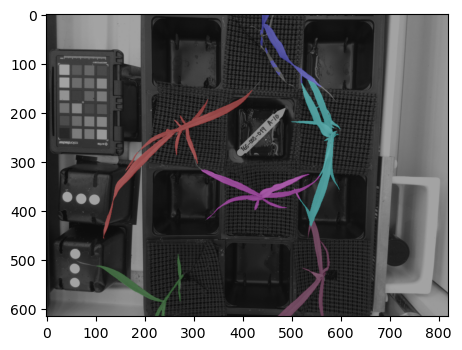

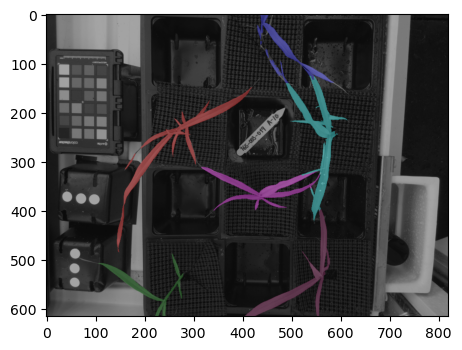

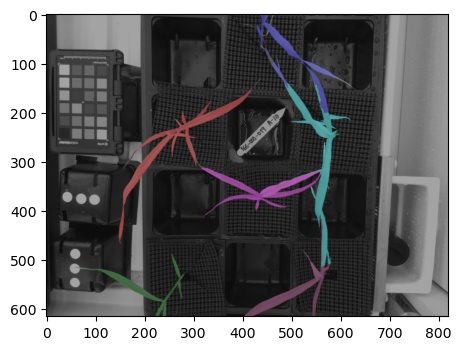

In [9]:
out = pcv.segment_image_series(images_paths_sort, masks_paths_sort, rois=valid_rois , save_labels=False, ksize=3)